<a href="https://colab.research.google.com/github/grbarbosa3/kaggle-challenges/blob/master/kaggleRL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
pip install -U scikit-learn 

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [2]:
df_train = pd.read_csv("/content/datasets_1256_2242_train.csv")
df_test = pd.read_csv("/content/datasets_1256_2242_test.csv")

In [3]:
df_train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [37]:
# Checking where is the missing value

df_train[df_train['y'].isnull()].index.tolist()


[213]

In [49]:
# Droping the missing value

df_clean = df_train.drop([213])


In [50]:
# Hyperparameters

model = LinearRegression()

# Creating the Feature Matrix and Target Vector

X_train = df_clean['x'].values.reshape(-1,1)
y_train = df_clean['y']

# Training the model

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
df_test = pd.read_csv("/content/datasets_1256_2242_test.csv")

In [57]:
# checking for missing values

df_test[df_test['y'].isnull()].index.tolist()

[]

In [60]:
X_test = df_test['x'].values.reshape(-1,1)

In [69]:
y_test = df_test['y']

In [61]:
y_pred = model.predict(X_test)

In [62]:
# Coefficient and Intercept

print("Coefficient:\t", model.coef_)
print("Intercetp:\t", model.intercept_)

Coefficient:	 [1.00065638]
Intercetp:	 -0.10726546430097272


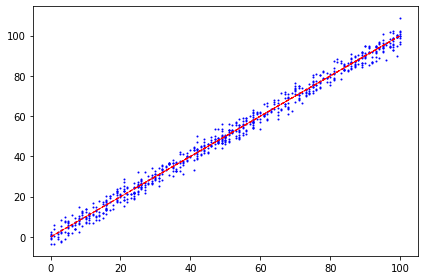

In [66]:
# Plotting

fig, ax = plt.subplots()
ax.scatter(X_train, y_train, s=1, color='blue')
ax.plot (X_train, (model.coef_ * X_train + model.intercept_), '--r', linewidth=1)
fig.tight_layout()

In [67]:
y_pred

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
print("R²:\t", r2_score(y_test, y_pred))
print("MAE:\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t", mean_squared_error(y_test, y_pred))

R²:	 0.9888014444327563
MAE:	 2.415771850041258
MSE:	 9.432922192039305
